<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Authors: Vadim Shestopalov (@vchulski), Valentina Biryukova (@myltykritik), and Yury Kashnitsky (@yorko). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Fall 2019. Quiz 3. Unsupervised learning & time series

Prior to working on this quiz, you'd better check out the corresponding course material:
 - [Unsupervised learning: PCA and clustering](https://mlcourse.ai/articles/topic7-unsupervised/), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering)
 - [Time series analysis with Python](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python)
 - [Predicting future with Facebook Prophet](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic09_time_series/topic9_part2_facebook_prophet.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-9-part-2-time-series-with-facebook-prophet)
 
Also, checkout corresponding mlcourse.ai [video lectures](https://mlcourse.ai/lectures)

### Your task is to:
 1. study the materials 
 1. write code where needed
 1. choose answers in the [webform](https://docs.google.com/forms/d/11bOOegz0U3pATEOhBH6ZV1m7sLOAcc-n0C9WjJygEQE)
 
Solutions are discussed during a [live YouTube session](https://youtu.be/xVnCdzGrOfk) on November 16.   You can get up to 10 credits (those points in a web-form, 15 max, will be scaled to a max of 10 credits). 
 
### <center> Deadline for Quiz 3: 2019 November 15, 20:59 GMT (London time)

## Part 1. Unsupervised learning

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#quiz3\_part1\_fall2019__*. TA for this part is Yury **@yorko**.

**Question 1.** Using the face recognition dataset downloaded with the code below choose the best number of `n_components` to achieve best accuracy on holdout set (holdout part should be 30% of the training set) using SVM model for classification (`SVC`) with the following params: `gamma=0.01` and `class_weight='balanced'` <br> Note: Use random seed equal to `17` everywhere (`train_test_split`, `PCA` and `SVC`). Also, specify `whiten=True` for PCA, this will normalize variances of PCA components and will positively affect classification just like in case of using `StandardScaler`.   

<br> What number of PCA components maximizes holdout accuracy of the SVM model?

 1. 50
 1. 100 **[+]**
 1. 150
 1. 200

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
# Download the data and load it as numpy arrays
lfw_people = fetch_lfw_people(data_home='../../data/faces/',
                              min_faces_per_person=70, resize=0.4)

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_features: 1850
n_classes: 7


In [3]:
for i, count in enumerate(np.bincount(y)):
    print(f'{count} photos of {target_names[i]}' )

77 photos of Ariel Sharon
236 photos of Colin Powell
121 photos of Donald Rumsfeld
530 photos of George W Bush
109 photos of Gerhard Schroeder
71 photos of Hugo Chavez
144 photos of Tony Blair


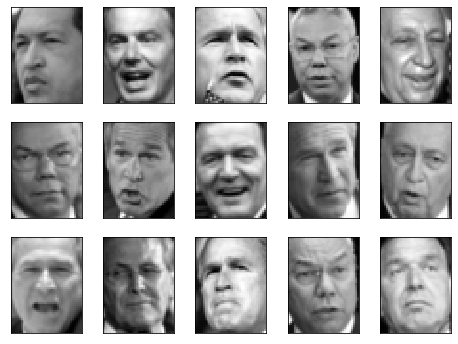

In [4]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='gray')

In [5]:
# You code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

for n_components in np.arange(50, 250, 50):
    
    pca = PCA(n_components=n_components, whiten=True, random_state=17).fit(X_train)
    
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    cls = SVC(gamma=0.01, class_weight='balanced', random_state=17)
    cls.fit(X_train_pca, y_train)
    
    prediction = cls.predict(X_test_pca)
    
    print(n_components, "is", accuracy_score(y_test, prediction))

50 is 0.7906976744186046
100 is 0.8294573643410853
150 is 0.7364341085271318
200 is 0.5736434108527132


**Question 2**. Choose the correct option. In K-means algorithm at each iteration: 
 1. Centroid of the cluster is moved in a random direction to increase robustness of the solution
 1. Each instance is attributed to a closest centroid **[+]**
 1. K is increased by 1
 1. All of the above

**Question 3**. Select all correct statements about agglomerative clustering

1. At each step, two random instances are merges to form a cluster
1. The algorithm terminates when all instances are merged into one cluster **[+]**
1. The ultimate number of iterations of the algorithm is $n$, where $n$ is the number of instances in the data set **[+]**
1. Output of the algorithm depends on the way to define distance between clusters, i.e. *linkage* **[+]**

**Question 4.** For which of the following clustering algorithms shall one specify the number of clusters beforehand?
 1. Agglomerative clustering
 1. K-means **[+]**
 1. Affinity Propagation
 1. All of the above

**Question 5.** Which of the following metrics, assessing clustering quality, can be calculated without knowing true cluster labels?
 1. Adjusted Mutual Information (AMI) **[+]**
 1. Silhouette
 1. Completeness **[+]**
 1. None of the above

## Part 2. Time series

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#quiz3\_part2\_fall2019__*. TA for this part is Valentina **@myltykritik**.

**Question 6.** Which of the following is an example of time series? Select all correct options.
1. Daily temperature in Moscow for 20 years **[+]**
1. Texts of news from Times site
1. Pigeon population in different Russian cities in 2019
1. GPS-coordinates of someone's trajectory **[+]**

**Question 7.** Which of these are possible components of a time series?
1. Trend
1. Seasonality
1. Noise
1. Cyclical
1. All of the above **[+]**

**Question 8.** Sales of some products in July were 200, in August - 600, in September - 500, in October - 100. What is the 3 month Moving Average forecast for November?
1. 200
1. 300
1. 400 **[+]**
1. 500

In [6]:
def moving_average(series, n):
    print(series[-n:])
    return np.average(series[-n:])

moving_average([200, 600, 500, 100], 3)

[600, 500, 100]


400.0

**Question 9.**
You have some stock (S&P) data [from here](https://www.kaggle.com/camnugent/sandp500/download) for five years until February 2018 and want to make prediction model for Facebook stocks. You need `FB_data.csv` file - it's committed to the course repo as well. 

1. Split the data into training and test sets. Everything before 01.09.2017 (`pd.datetime(2017, 9, 1)`) would form a training set. The rest would be a test set.
2. Train the `Prophet()` model with default parameters
3. Measure MAPE (mean average percentage error) for the test set

What test set MAPE do you get (approx.)?

1. 2.5%
1. 3.5%
1. 4.5% **[+]**
1. 5.5%

In [25]:
from fbprophet import Prophet

In [26]:
!pip list | grep prophet

'grep' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
df = pd.read_csv('FB_data.csv')
df = df[['date', 'close']].reset_index(drop=True)
df = df.rename({'close':'y', 'date':'ds'}, axis='columns')
df['ds'] = pd.to_datetime(df['ds'])

In [54]:
# You code here
X_train = df[df.ds < pd.datetime(2017, 9, 1)]
X_test = df[df.ds >= pd.datetime(2017, 9, 1)]["ds"]
y_test = df[df.ds >= pd.datetime(2017, 9, 1)].iloc[:, 1]

In [55]:
from sklearn.metrics import mean_absolute_error

In [56]:
model = Prophet()
model.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
forecast = model.predict(pd.DataFrame(X_test))

In [62]:
forecast.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2017-09-01  164.175336  165.781927  173.607439   164.175336   164.175336   
1 2017-09-05  164.724693  167.170194  174.790843   164.724693   164.724693   
2 2017-09-06  164.862032  167.918389  175.468913   164.862032   164.862032   
3 2017-09-07  164.999371  167.912191  175.834882   164.999371   164.999371   
4 2017-09-08  165.136710  168.456797  176.009873   165.136710   165.136710   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        5.534371              5.534371              5.534371  0.237074   
1        6.316554              6.316554              6.316554  0.159657   
2        6.670075              6.670075              6.670075  0.290235   
3        6.902520              6.902520              6.902520  0.305489   
4        7.041289              7.041289              7.041289  0.237074   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      0.237074      0.237074  5.297297      5.297297      5.297297   
1      0.159657      0.159657  6.156896      6.156896      6.156896   
2      0.290235      0.290235  6.379840      6.379840      6.379840   
3      0.305489      0.305489  6.597030      6.597030      6.597030   
4      0.237074      0.237074  6.804215      6.804215      6.804215   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  169.709707  
1                         0.0  171.041246  
2                         0.0  171.532107  
3                         0.0  171.901891  
4                         0.0  172.177999

In [36]:
def mape(y_true, y_test):
    return np.mean(np.abs((y_true - y_test) / y_true)) * 100

In [64]:
mean_absolute_error(y_test, forecast['yhat'])

4.5123522323470775

**Question 10.** What steps should we perform when doing cross-validation for time series? Select all correct answers.

1. Sort your data by time to emphasize time pattern **[+]**
1. No way! Shuffle all the data well, so model will not leak on random patterns!
1. Make several folds, so in validation will be all data from initial series ↓ [image credit](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85)
    <img src="../../img/kfold.png" width=400>
1. No way! Perform method, known as "cross-validation on a rolling basis".**[+]**
    <img src="../../img/time_series_cv.png" width="400">